## Supervised Learning - Building a Student Performace Prediction System  

## Question 1 - Classification vs. Regression

*The aim of this project is to predict how likely a student is to pass. Which type of supervised learning problem is this, classification or regression? Why?*

#### Answer:
This project is a classification supervised learning problem because the variable to predict, i.e. if a student graduates or fails to graduate, is categorical. On this case this a dichotomous categorical variable where the only two possible values are "pass" or "fail".

### Overview:

1.Read the problem statement.

2.Get the dataset.

3.Explore the dataset.

4.Pre-processing of dataset.

5.Transform the dataset for building machine learning model.

6.Split data into train, test set.

7.Build Model.

8.Apply the model.

9.Evaluate the model.

10.Provide insights.

## Problem Statement 

Using Logistic Regression **predict the performance of student**. The classification goal is to predict whether the student will pass or fail.

## Dataset 

This data approach student achievement in secondary education of two Portuguese schools. The data attributes include student grades, demographic, social and school related features) and it was collected by using school reports and questionnaires. Two datasets are provided regarding the performance in Mathematics.

**Source:** https://archive.ics.uci.edu/ml/datasets/Student+Performance


## Question 2
## Exploring the Data
*Read the dataset file using pandas. Take care about the delimiter.*

#### Answer:

In [62]:
import pandas as pd
import numpy as np

In [63]:
student_df = pd.read_csv("students-data.csv", delimiter = ";")
student_df.shape

(395, 33)

## Question 3
## Drop missing values
*Set the index name of the dataframe to **"number"**. Check sample of data to drop if any missing values are there.*

#### Answer:

In [64]:
student_df.index.name = "Number"
student_df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
Number,,,,,,,,,,,,,,,,,,,,,
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [65]:
student_df.isnull().sum().sum()

0

## Transform Data

*Print all the attribute names which are not numerical.*

**Hint:** check **select_dtypes()** and its **include** and **exclude** parameters.**

#### Answer:

In [66]:
label_not_num = student_df.select_dtypes(include = ['object']).columns
label_not_num

Index(['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob',
       'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities',
       'nursery', 'higher', 'internet', 'romantic'],
      dtype='object')

## Drop variables with less variance

*Find the variance of each numerical independent variable and drop whose variance is less than 1.*

In [67]:
variance = (student_df.var()[student_df.var() < 1].index.values)

In [68]:
variance

array(['traveltime', 'studytime', 'failures', 'famrel', 'freetime',
       'Dalc'], dtype=object)

In [69]:
student_df1 = student_df.drop(variance, axis=1)

In [70]:
student_df1.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'schoolsup', 'famsup', 'paid',
       'activities', 'nursery', 'higher', 'internet', 'romantic', 'goout',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

In [71]:
student_df1.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,higher,internet,romantic,goout,Walc,health,absences,G1,G2,G3
Number,,,,,,,,,,,,,,,,,,,,,
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,yes,no,no,4,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,yes,yes,no,3,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,yes,yes,no,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,yes,yes,yes,2,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,yes,no,no,2,2,5,4,6,10,10


## Question 4 - Encode all categorical variables to numerical

Take the list of categorical attributes(from the above result) and convert them into neumerical variables. After that, print the head of dataframe and check the values.

**Hint:** check **sklearn LabelEncoder()**

#### Answer:

In [72]:
#cat_columns = student_df1.columns.tolist()

In [73]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [74]:
student_df1[label_not_num] = student_df1[label_not_num].apply(lambda col: le.fit_transform(col))

In [78]:
student_df1.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,higher,internet,romantic,goout,Walc,health,absences,G1,G2,G3
Number,,,,,,,,,,,,,,,,,,,,,
0,0,0,18,1,0,0,4,4,0,4,...,1,0,0,4,1,3,6,0,0,0
1,0,0,17,1,0,1,1,1,0,2,...,1,1,0,3,1,3,4,0,0,0
2,0,0,15,1,1,1,1,1,0,2,...,1,1,0,2,3,3,10,0,0,1
3,0,0,15,1,0,1,4,2,1,3,...,1,1,1,2,1,5,2,1,1,1
4,0,0,16,1,0,1,3,3,2,2,...,1,0,0,2,2,5,4,0,1,1


## Question 5 - Convert the continuous values of grades into classes

*Consider the values in G1, G2 and G3 with >= 10 as pass(1) and < 10 as fail(0) and encode them into binary values. Print head of dataframe to check the values.*

#### Answer:

In [76]:
#G3
mask_zero_G3 = student_df1['G3'] < 10
student_df1.loc[mask_zero_G3, 'G3'] = 0
mask_one_G3 = student_df1['G3']>= 10
student_df1.loc[mask_one_G3, 'G3'] = 1

#G2
mask_zero_G2 = student_df1['G2'] < 10
student_df1.loc[mask_zero_G2, 'G2'] = 0
mask_one_G2 = student_df1['G2']>= 10
student_df1.loc[mask_one_G2, 'G2'] = 1

#G1
mask_zero_G1 = student_df1['G1'] < 10
student_df1.loc[mask_zero_G1, 'G1'] = 0
mask_one_G1 = student_df1['G1']>= 10
student_df1.loc[mask_one_G1, 'G1'] = 1

In [79]:
student_df1[['G1','G2','G3']].head()

,G1,G2,G3
Number,,,
0,0,0,0
1,0,0,0
2,0,0,1
3,1,1,1
4,0,1,1


## Question 6 
*Consider G3 is the target attribute and remaining all attributes as features to predict G3. Now, separate features and target into separate dataframes and name them X and y respectively.*

In [80]:
X = student_df1.drop('G3', axis = 1)
X.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,nursery,higher,internet,romantic,goout,Walc,health,absences,G1,G2
Number,,,,,,,,,,,,,,,,,,,,,
0,0,0,18,1,0,0,4,4,0,4,...,1,1,0,0,4,1,3,6,0,0
1,0,0,17,1,0,1,1,1,0,2,...,0,1,1,0,3,1,3,4,0,0
2,0,0,15,1,1,1,1,1,0,2,...,1,1,1,0,2,3,3,10,0,0
3,0,0,15,1,0,1,4,2,1,3,...,1,1,1,1,2,1,5,2,1,1
4,0,0,16,1,0,1,3,3,2,2,...,1,1,0,0,2,2,5,4,0,1


In [84]:
y = student_df1['G3']
y.head()

Number
0    0
1    0
2    1
3    1
4    1
Name: G3, dtype: int64

## Visualization

## Question 7

*Plot G2 and G3 and give your understanding on relation between both variables.*

In [86]:
import seaborn as sns
pd.crosstab(student_df1['G2'], student_df1['G3'])

G3,0,1
G2,,
0,122,24
1,8,241



The G3 depends a great deal on the G2. Thus, the G2 can be a good predictor of the outcome variable.


## Question 8

*Plot the number of students in each school and number of students with different ages in separate plots.*

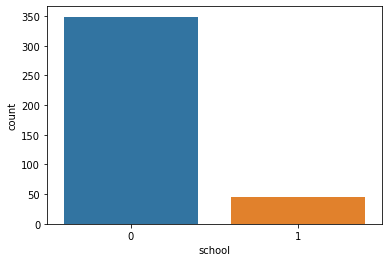

In [91]:
import seaborn as sns
sns.countplot(x='school', data=student_df1)

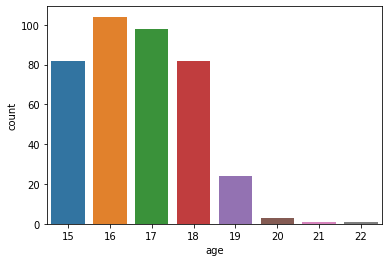

In [97]:
sns.countplot(x='age', data=student_df1 )

## Question 9 - Training and testing data split

*So far, you have converted all categorical features into numeric values. Now, split the data into training and test sets with training size of 300 records. Print the number of train and test records.*

**Hint:** check **train_test_split()** from **sklearn**

#### Answer:

In [98]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.24)
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(300, 26) (300,)
(95, 26) (95,)


## Question 10 - Model Implementation and Testing the Accuracy

*Build a **LogisticRegression** classifier using **fit()** and **predict()** functions in sklearn. Print Accuracy and F1 score of Training and Test sets.*

#### Answer:

In [99]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()
LR.fit(X_train,y_train)
prediction = LR.predict(X_test)

C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [100]:
from sklearn.metrics import classification_report
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.80      0.96      0.87        25
           1       0.98      0.91      0.95        70

    accuracy                           0.93        95
   macro avg       0.89      0.94      0.91        95
weighted avg       0.94      0.93      0.93        95



In [101]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, prediction)

0.9263157894736842

# Naive bayes with Iris data

### Import Iris.csv

In [111]:
iris = pd.read_csv("iris_external3.csv")
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [112]:
iris.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,152.000000,151.000000,150.000000,150.000000,151.000000
mean,76.500000,5.843709,3.054000,3.758667,1.202649
std,44.022721,0.825314,0.433594,1.764420,0.762185
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.750000,5.100000,2.800000,1.600000,0.300000
50%,76.500000,5.800000,3.000000,4.350000,1.300000
75%,114.250000,6.400000,3.300000,5.100000,1.800000
max,152.000000,7.900000,4.400000,6.900000,2.500000


In [113]:
iris.isnull().sum()

Id               0
SepalLengthCm    1
SepalWidthCm     2
PetalLengthCm    2
PetalWidthCm     1
Species          0
dtype: int64

In [114]:
iris.fillna(iris.mean(), inplace=True)
iris.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [115]:
iris.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
147,148,6.500000,3.000,5.200000,2.000000,Iris-virginica
148,149,6.200000,3.400,5.400000,2.300000,Iris-virginica
149,150,5.900000,3.000,5.100000,1.800000,Iris-virginica
150,151,5.900000,3.054,3.758667,1.202649,Iris-virginica
151,152,5.843709,3.054,3.758667,1.800000,Iris-virginica


In [116]:
iris = iris.drop(['Id'], axis=1)
iris.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


### Slice data set for Independent variables and dependent variables
#### Please note 'Species' is my dependent variables, name it y and independent set data as X

In [117]:
X = iris.drop(['Species'], axis=1)
X.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [118]:
y = iris['Species']
y.head()

0    Iris-setosa
1    Iris-setosa
2    Iris-setosa
3    Iris-setosa
4    Iris-setosa
Name: Species, dtype: object

### Find the distribution of target variable (Class)

In [123]:
pd.value_counts(iris["Species"])

Iris-virginica     52
Iris-setosa        50
Iris-versicolor    50
Name: Species, dtype: int64

### Plot the distribution of target variable using histogram

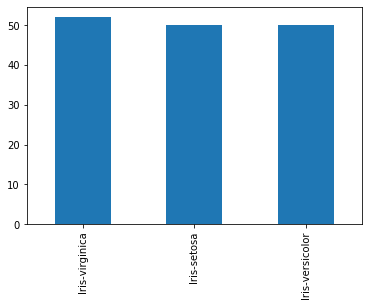

In [121]:
pd.value_counts(iris["Species"]).plot(kind="bar")

In [132]:
#from pandas.plotting import scatter_matrix
#scatter_matrix(iris, alpha=0.2, figsize=(12, 12), diagonal='kde')

### Plot Scatter Matrix to understand the distribution of variables and give insights from it( 1 Marks)

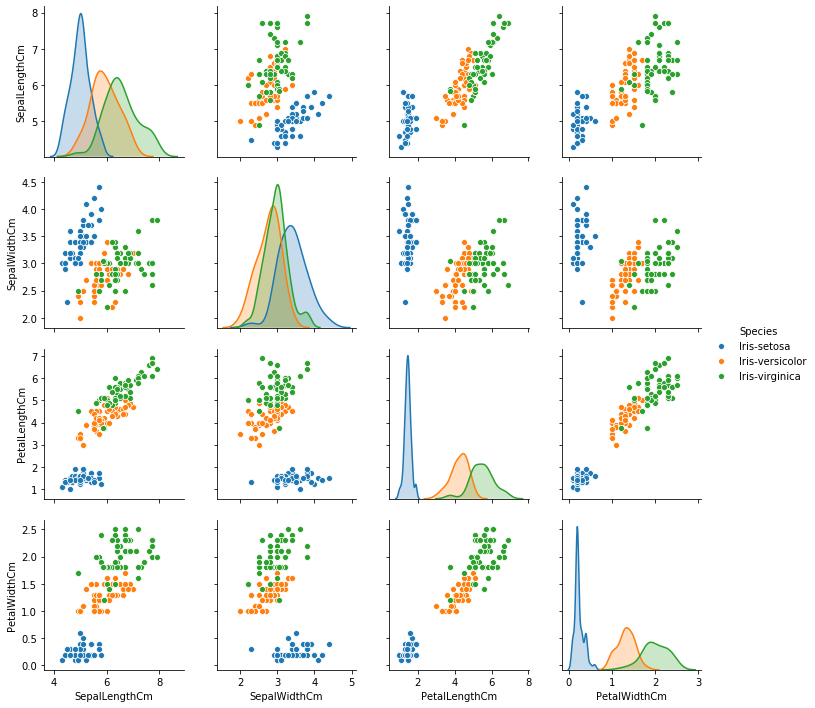

In [133]:
sns.pairplot(iris, hue="Species")

It is clearly visible that the Sepal Length and Sepal Width have overlaping distributions hence can not be used for prediction of the Species. While PetalWidth and Petal Length do not have overlapping distribution and separate peaks so they could be good for prediction of Species.

### Summary Statistics and explain insights for at least 2 variables

In [134]:
iris.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,152.000000,152.000000,152.000000,152.000000
mean,5.843709,3.054000,3.758667,1.202649
std,0.822577,0.430713,1.752697,0.759657
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.300000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


We know that for a normal distribution 68 percent of the values lie between 75% and 25% which explains the higher standard deviation of the column PetalLength compared to other features. Also the difference between the min max values explains the same
The low standard deviation of the SepalWidth actually makes it not a good feature to predict the Species as the values are not well distributed as compared to PetalWidth which we saw in the pairplot as well


### Correlation among all variables and give your insights

In [135]:
iris.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109368,0.871741,0.816256
SepalWidthCm,-0.109368,1.000000,-0.420516,-0.355808
PetalLengthCm,0.871741,-0.420516,1.000000,0.960771
PetalWidthCm,0.816256,-0.355808,0.960771,1.000000


PetalLength and Sepal width are quite negatively correlated and one feature does not affect the other in a linear way

On the other hand PetalLength and PetalWidth are quite highly correlated almost approching to 1 this show a linear relation between the 2 features

### Split data in Training and Validation in 80:20

In [138]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(121, 4) (121,)
(31, 4) (31,)


### Do Feature Scaling

Feature scaling is required where one or two feature have very high values but in this iris dataset none of the features have 
very high values compared to other features.

### Train and Fit NaiveBayes Model

In [141]:
from sklearn.naive_bayes import GaussianNB

iris_GNB = GaussianNB()
iris_GNB = iris_GNB.fit(X_train, y_train)

In [143]:
y_pred = iris_GNB.predict(X_test)
y_pred

array(['Iris-setosa', 'Iris-virginica', 'Iris-virginica', 'Iris-setosa',
       'Iris-setosa', 'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-virginica', 'Iris-virginica', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-virginica'],
      dtype='<U15')

### Print Accuracy and Confusion Matrix and Conclude your findings

In [144]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.9354838709677419

In [145]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[11  0  0]
 [ 0  9  0]
 [ 0  2  9]]


2 values were incorrectly predicted by the model and all the values along the diagonal were actually classified correctly